In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import numpy as np
import pandas as pd
import visualkeras
from PIL import ImageFont
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [4]:
train_data = train_data.reshape(60000, 28, 28, 1) / 255.0 
test_data = test_data.reshape(10000, 28, 28, 1) / 255.0

In [5]:
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(10, activation='softmax'))

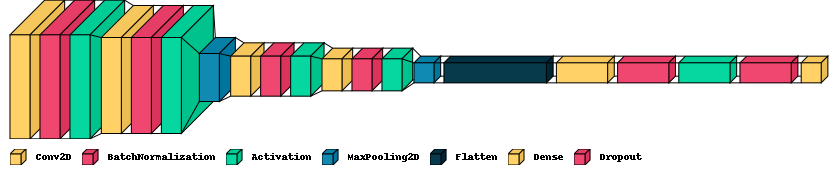

In [13]:
visualkeras.layered_view(model, legend=True)

In [14]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

In [16]:
gen_train = ImageDataGenerator(rotation_range=8,        # Degree range for random rotations.
                               shear_range=0.3,         # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                               width_shift_range=0.08,  # Fraction of total width
                               height_shift_range=0.08, # Fraction of total height
                               zoom_range=0.08)         # Range for random zoom ([lower, upper] = [1-zoom_range, 1+zoom_range])

train_generator = gen_train.flow(train_data, train_label, batch_size=64)

gen_test = ImageDataGenerator()

test_generator = gen_test.flow(test_data, test_label, batch_size=64)

In [17]:
history = model.fit(train_generator, 
                    steps_per_epoch=60000 // 64,
                    epochs=5, 
                    validation_data=test_generator, 
                    validation_steps=10000 // 64)

Epoch 1/5
937/937 [==============================] - 39s 42ms/step - loss: 0.1255 - categorical_accuracy: 0.9616 - val_loss: 0.0392 - val_categorical_accuracy: 0.9874
Epoch 2/5
937/937 [==============================] - 40s 43ms/step - loss: 0.0535 - categorical_accuracy: 0.9838 - val_loss: 0.0310 - val_categorical_accuracy: 0.9890
Epoch 3/5
937/937 [==============================] - 41s 44ms/step - loss: 0.0445 - categorical_accuracy: 0.9863 - val_loss: 0.0247 - val_categorical_accuracy: 0.9909
Epoch 4/5
937/937 [==============================] - 41s 44ms/step - loss: 0.0393 - categorical_accuracy: 0.9875 - val_loss: 0.0232 - val_categorical_accuracy: 0.9921
Epoch 5/5
937/937 [==============================] - 40s 43ms/step - loss: 0.0360 - categorical_accuracy: 0.9888 - val_loss: 0.0196 - val_categorical_accuracy: 0.9933


In [18]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 2s 18ms/step - loss: 0.0197 - categorical_accuracy: 0.9933
loss (cross-entropy) : 0.019659211859107018
test accuracy : 0.9933000206947327


In [19]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

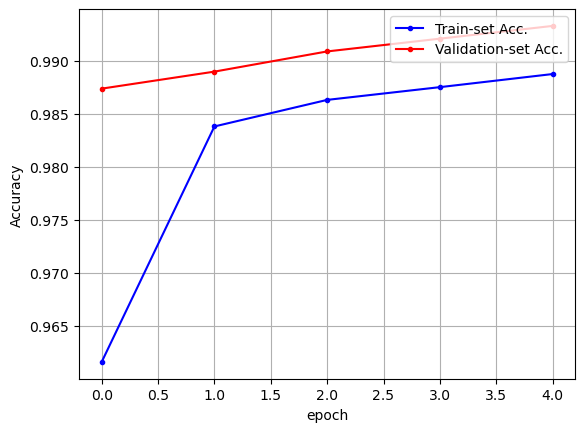

In [22]:
x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()